In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/Users/saikiran/Downloads/financial_health_analysis_dataset.csv")

In [4]:
print(df.head())

         Date  Revenue  Expenses  Profit  Cash Flow   Debt  Assets  \
0  2000-01-01    91910     56996   34914      36583  37428   50606   
1  2000-01-02    76044     17614   58430      57621  15068  143451   
2  2000-01-03    87214     49647   37567      42285  20229   67733   
3  2000-01-04    53827     72940  -19113     -16957  33478   90394   
4  2000-01-05    75820     15620   60200      63913  21908  110797   

   Liabilities  Marketing Spend  Employee Count  Tax Paid  Operational Cost  
0        50085            14159             278      7633          42235.94  
1        53894            12173             346     11913          12960.62  
2        30019            15107             379     11490          39471.72  
3        53827            17132             444      3905          56926.27  
4        28184            14723             220     13197          12298.48  


In [7]:
print(df.isnull().sum())

Date                0
Revenue             0
Expenses            0
Profit              0
Cash Flow           0
Debt                0
Assets              0
Liabilities         0
Marketing Spend     0
Employee Count      0
Tax Paid            0
Operational Cost    0
dtype: int64


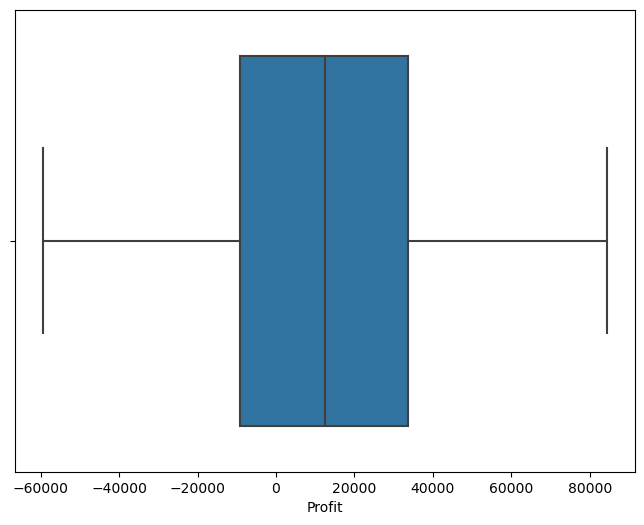

Outliers in Profit: Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Cash Flow, Debt, Assets, Liabilities, Marketing Spend, Employee Count, Tax Paid, Operational Cost, z_score_profit]
Index: []


In [11]:
# Box plot for Profit to identify outliers
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Profit'])
plt.title= ("Box Plot of Profit")
plt.show()

# You can also use Z-score or IQR to detect outliers
from scipy.stats import zscore

df['z_score_profit'] = zscore(df['Profit'])
outliers =df[(df['z_score_profit'] > 3) | (df['z_score_profit'] < -3)]

print("Outliers in Profit:", outliers)

In [13]:
# Check if Profit = Revenue - Expenses
df['Calculated_Profit'] = df['Revenue'] - df['Expenses']
inconsistent_rows = df[df['Profit'] != df['Calculated_Profit']]
print("Inconsistent Rows:", inconsistent_rows)

Inconsistent Rows: Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Cash Flow, Debt, Assets, Liabilities, Marketing Spend, Employee Count, Tax Paid, Operational Cost, z_score_profit, calculated_profit, Calculated_Profit]
Index: []


In [19]:
# Descriptive statistics
print(df.describe())

# Additional statistics (mode, skewness, etc.)
print("Mode of Revenue:", df['Revenue'].mode()[0])
print("Skewness of Profit:", df['Profit'].skew())

            Revenue      Expenses       Profit     Cash Flow          Debt  \
count  20000.000000  20000.000000  20000.00000  20000.000000  20000.000000   
mean   59508.545100  47249.836400  12258.70870  12248.088650  30082.962300   
std    23209.165749  18862.986125  29843.89368  29982.651637  11532.833832   
min    20002.000000  15002.000000 -59398.00000 -62580.000000  10001.000000   
25%    39384.000000  30729.750000  -9143.00000  -9307.000000  20124.750000   
50%    59138.500000  46881.000000  12519.00000  12370.500000  30209.000000   
75%    79509.250000  63630.750000  33641.00000  33594.000000  40115.000000   
max    99996.000000  79994.000000  84313.00000  86768.000000  49999.000000   

              Assets   Liabilities  Marketing Spend  Employee Count  \
count   20000.000000  20000.000000     20000.000000    20000.000000   
mean    99968.189150  44978.947150     12483.372500      274.786350   
std     28822.209403  14505.592213      4340.376592      130.003427   
min     50002

In [ ]:
# Line chart for Revenue and Expenses over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Revenue'], label='Revenue')
plt.plot(df['Date'], df['Expenses'], label='Expenses')
plt.title('Revenue and Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Box plot for Profit and Cash Flow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cash Flow'])
plt.title('Box Plot of Cash Flow')
plt.show()

# Pie chart for Expenses Categories (if available)
# Assuming 'Marketing Spend' and 'Operational Cost' are expense categories
expenses = df[['Marketing Spend', 'Operational Cost']].sum()
plt.figure(figsize=(6, 6))
plt.pie(expenses, labels=expenses.index, autopct='%1.1f%%')
plt.title('Proportion of Expenses Categories')
plt.show()


           Revenue  Expenses    Profit      Debt
Revenue   1.000000  0.004362  0.774928 -0.000872
Expenses  0.004362  1.000000 -0.628663 -0.003432
Profit    0.774928 -0.628663  1.000000  0.001491
Debt     -0.000872 -0.003432  0.001491  1.000000


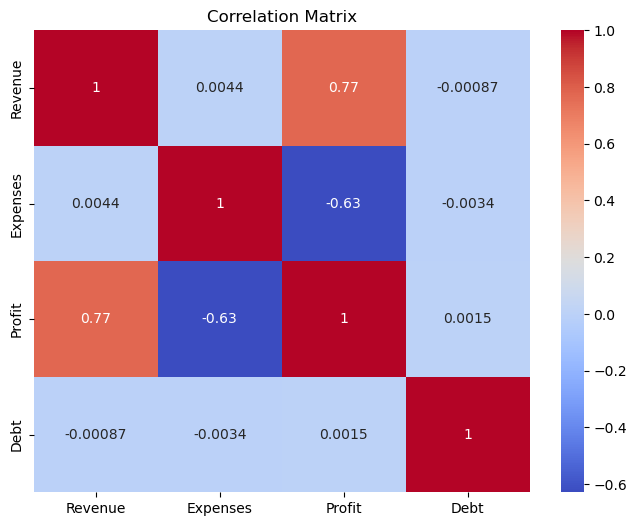

In [25]:
# Correlation matrix
correlation_matrix = df[['Revenue', 'Expenses', 'Profit', 'Debt']].corr()
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
Summary of Key findings:
    
    * The dataset does not have any missing values
    * Based on the Z-score method, no outliers are detected.
    * The manually calculated profit(Revenue-Expenses) matches the profit column
    * The median revenue is $59,138.50
    * The median expenses is $46,881
    * So, the mean profit is $12,258.71
    * The median cash flow is $12,370.50, close to median profit, suggesting a strong correlation between cash flow and profit
    * On average, Assets ($99,968) are much higher than Liabilities ($44,978), indicating a stable financial position.
    * Profit has a near zero skewness (0.00058), meaning the distribution is symmetrical, with an equal number of gains and losses.
    * Revenue and Expenses fluctuate over time, suggesting seasonal or operational variability.
    * Profit and Cash Flow have a wide range, but no extreme outliers were found.
    * Cash Flow distribution follows a similar trend as Profit, reinforcing financial stability.